<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [18]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [19]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [20]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv("weight_height.csv")
des = df.describe()

In [21]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699
Nan,0.000000,0.000000
%Nan,0.000000,0.000000


In [22]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas

df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [23]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)
df2 = df.copy()
df2['Weight'] = df2['Weight'] * 0.453592
df2['Height'] = df2['Height'] * 0.0254
df2['Gender'] = df2['Gender'].replace({'Male': 'Masculino', 'Female': 'Femenino'})
df2.head()

,Gender,Height,Weight
0,Masculino,1.875714,109.720985
1,Masculino,1.747060,73.622732
2,Masculino,1.882397,96.497550
3,Masculino,1.821967,99.809504
4,Masculino,1.774998,93.598619


In [24]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
df2.shape

(10000, 3)

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

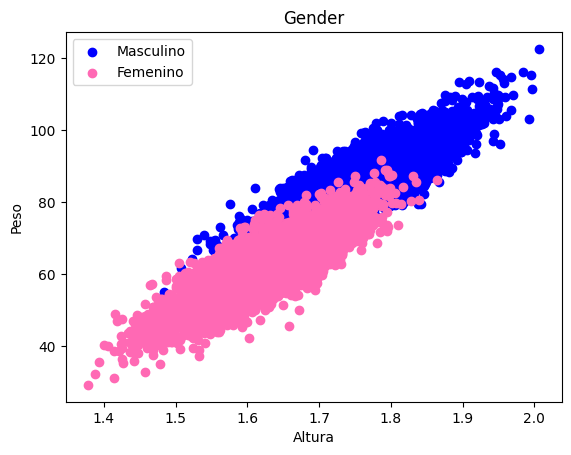

In [25]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos

fig, ax = plt.subplots()
ax.scatter(df2[df2['Gender'] == 'Masculino']['Height'], df2[df2['Gender'] == 'Masculino']['Weight'], color='blue', label='Masculino')
ax.scatter(df2[df2['Gender'] == 'Femenino']['Height'], df2[df2['Gender'] == 'Femenino']['Weight'], color='hotpink', label='Femenino')
ax.set_xlabel('Altura')
ax.set_ylabel('Peso')
ax.set_title('Gender')
ax.legend()
plt.show()


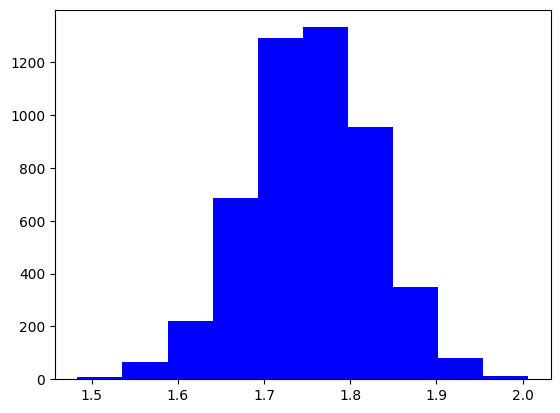

In [26]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
# Filtrar los datos por género masculino
masculino = df2[df2['Gender'] == 'Masculino']
genero_masculino = masculino['Height']

fig = plt.figure()
ax = plt.subplot()
ax.hist(genero_masculino, color="blue")
plt.show()

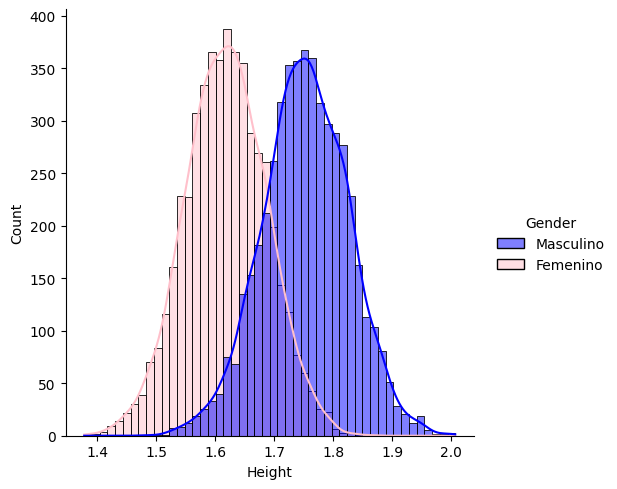

In [27]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros = data=df2, x="altura", hue="sexo"

sns.displot(data=df2, x='Height', hue='Gender', palette={'Masculino': 'blue', 'Femenino': 'pink'}, kde=True)
plt.show()

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


In [28]:
X = df2['Weight']
y = df2['Height']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.linear_model import LinearRegression
linea = LinearRegression()
linea.fit(X_train.values.reshape(-1, 1), y_train)
y_hat = linea.predict(X_test.values.reshape(-1, 1))

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [29]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_hat)
print('Coeficiente de determinación:', r2)

Coeficiente de determinación: 0.8544092997672645


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

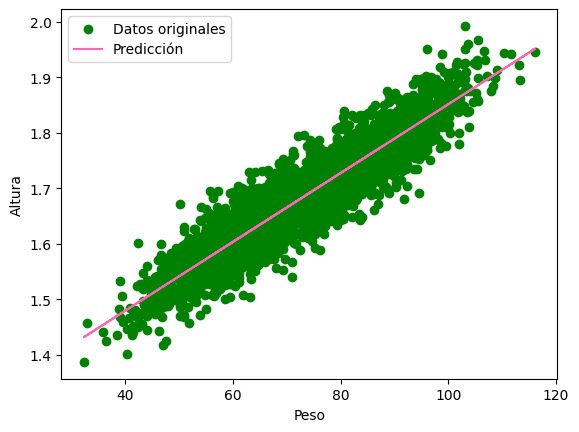

In [30]:
plt.scatter(X_test, y_test, color='green', label='Datos originales')
plt.plot(X_test, y_hat, color='hotpink', label='Predicción')
plt.xlabel('Peso')
plt.ylabel('Altura')
plt.legend()
plt.show()